## Студентка: Елисеева Елизавета ИУ5-23М


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import OneHotEncoder

import sklearn

In [2]:
data = pd.read_csv("weatherHistory.csv")
%matplotlib inline

In [71]:
data['year'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).year))
data['month'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).month))
data['day'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).day))
data['hour'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).hour))

data['season'] = pd.DataFrame(data['month'].apply(lambda x: 0 if x == 12 else x//3 ))

data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day,hour,year_month,season
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4,1,0,2006_4,1
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4,1,1,2006_4,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,2,2006_4,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,3,2006_4,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,4,2006_4,1
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,2006,4,1,5,2006_4,1
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,2006,4,1,6,2006_4,1
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,2006,4,1,7,2006_4,1
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,2006,4,1,8,2006_4,1
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.,2006,4,1,9,2006_4,1


In [7]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Formatted Date', ('object', 0)),
 ('Summary', ('object', 0)),
 ('Precip Type', ('object', 517)),
 ('Temperature (C)', ('float64', 0)),
 ('Apparent Temperature (C)', ('float64', 0)),
 ('Humidity', ('float64', 0)),
 ('Wind Speed (km/h)', ('float64', 0)),
 ('Wind Bearing (degrees)', ('float64', 0)),
 ('Visibility (km)', ('float64', 0)),
 ('Loud Cover', ('float64', 0)),
 ('Pressure (millibars)', ('float64', 0)),
 ('Daily Summary', ('object', 0)),
 ('year', ('int64', 0)),
 ('month', ('int64', 0)),
 ('day', ('int64', 0)),
 ('hour', ('int64', 0)),
 ('year_month', ('object', 0))]

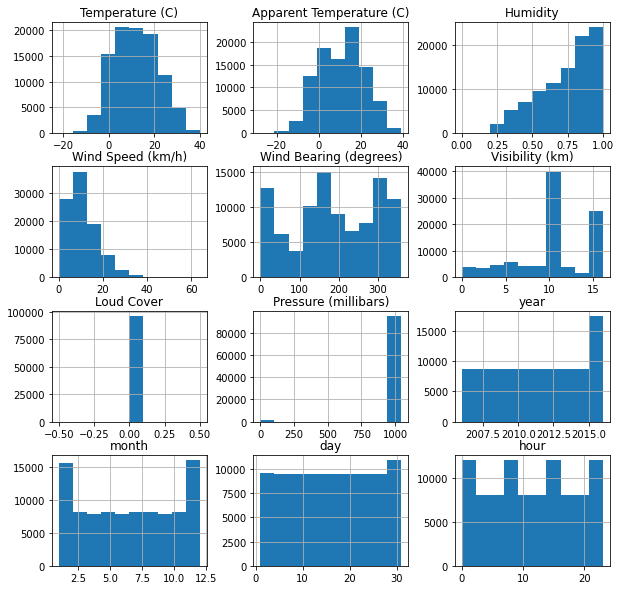

In [8]:
data.hist(figsize=(10,10));

# ШАГ 1

<AxesSubplot:>

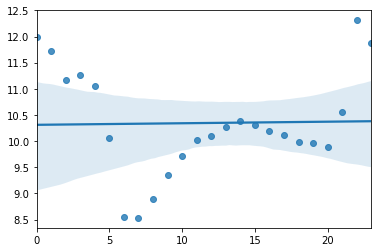

In [10]:
# зависимость видимости от времени
hum_avg = []
# vis_avg = []
hour_list = data['hour'].unique()
for hour in hour_list:
    hum_avg.append(data[data['hour']==hour]['Humidity'].mean())
#     vis_avg.append(data[data['hour']==hour]['Visibility (km)'].mean())

sns.regplot(x=hour_list, y=vis_avg)

In [ ]:
# Как видно из диаграммы, ночью видимо значительно хуже. Самый лучший показатель видимости выпадает на 6 утра. Днём видимость средняя.

# ШАГ 2

<AxesSubplot:>

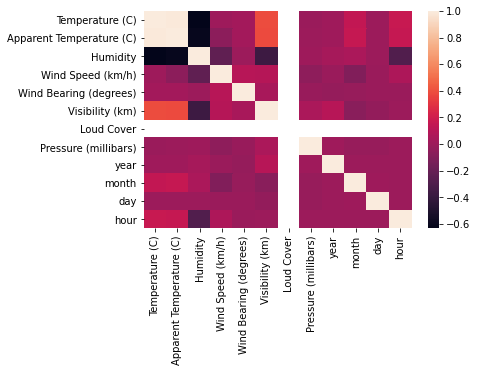

In [13]:
sns.heatmap(data.corr())

In [11]:
# Но в Датасете даны два столбца: температура воздуха и ощущаемая температура. 
# Необходимо понять какое из этих значение больше релевантно использовать в случае обучения нейросети для определения влажности.
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),year,month,day,hour
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447,0.017406,0.149110,-0.000388,0.170134
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219,0.017118,0.158522,0.002018,0.160574
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454,0.039289,0.056429,0.005107,-0.285991
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263,-0.004261,-0.098950,-0.006131,0.067615
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651,-0.025696,-0.019092,-0.003388,-0.003983
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818,0.107268,-0.071159,-0.026578,0.004951
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000,0.016101,-0.019118,-0.014860,0.000335
year,0.017406,0.017118,0.039289,-0.004261,-0.025696,0.107268,NaN,0.016101,1.000000,-0.000347,0.000474,0.000045
month,0.149110,0.158522,0.056429,-0.098950,-0.019092,-0.071159,NaN,-0.019118,-0.000347,1.000000,0.010547,-0.000311


In [14]:
# Корреляция между температурой и ощущаемой температурой почти равна единице, это значит, что нельзя одновременно
# использовать эти оба признака для обучения.

# Смотрим на корреляцию между температурой и влажностью (-0.63)
# И между ощущаемой температорй и влажностью (-0.60)

# Принципиально сейчас не важно, то всё таки лучше использовать признак, который имеет большую корреляцию с целевым признаком,
# значит ощущаемой температурой можно пренебреч

# ШАГ 3

In [15]:
# Как влажность и температура меняются в течении дня
hum_avg = []
t_avg = []
hour_list = data['hour'].unique()
for hour in hour_list:
    hum_avg.append(data[data['hour']==hour]['Humidity'].mean())
    t_avg.append(data[data['hour']==hour]['Temperature (C)'].mean()) 

In [17]:
df_for_scatterplot = pd.DataFrame(list(zip(hum_avg, t_avg, hour_list)), columns =['hum_avg', 't_avg', 'hour'])
df_for_scatterplot

,hum_avg,t_avg,hour
0,0.824321,9.472529,0
1,0.838522,9.056754,1
2,0.848201,8.746398,2
3,0.856820,8.323950,3
4,0.865661,8.058013,4
5,0.870639,7.859631,5
6,0.869669,7.951559,6
7,0.843172,8.928751,7
8,0.796089,10.398009,8
9,0.736004,12.029365,9


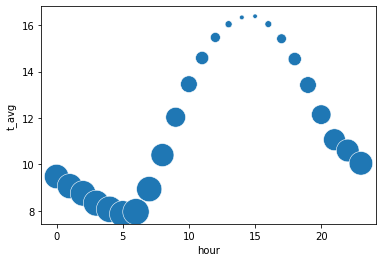

In [18]:
sns.scatterplot(data = df_for_scatterplot ,x='hour', y='t_avg', size='hum_avg', legend=False, sizes=(20, 700))
plt.show()

Как видно из диаграммы влажность ниже, чем выше температура (а температура повышается в дневной период при солнце с 10 до 20 часов). Отсюда можно сделать вывод, что влажность воздуха ниже в период невысоких температур, а это как раз в ночное время. Днём же вероятность высокой влажности намного ниже

# ШАГ 4

In [ ]:
# Как меняется температу в течении года примерно очевидно. Интересно как меняется скорость ветра в разные сезоны?

In [83]:
data['year'].unique()

array([2006, 2010, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [78]:
# Группировку по сезонам
season_list = data['season'].unique()
day_list = data['day'].unique()
wind_avg_year = [list() for _ in range(len(season_list))]


season_list.sort()
day_list.sort()

for season in season_list:
    for day in day_list:
        wind_avg_year[season-1].append(data[(data['season']==season) & (data['day']==day)]['Wind Speed (km/h)'].mean())
    
# wind_avg_year[1-1].append((data[data['month']==4) & (data['day']==1)]['Wind Speed (km/h)'])

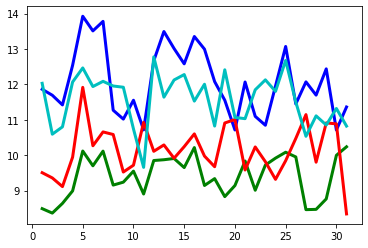

In [81]:
fig, ax = plt.subplots()
colors = ['b','g','r','c']
for values, color in zip(wind_avg_year, colors):
    ax.plot(day_list, values, color=color, lw=3)

plt.show()

# Синий - Зима
# Бирюзовый - Осень
# Красный - Лето
# Зеленый - Весна

Выше представлена диаграмма скорости ветра в течении 10 лет в среднем для каждого сезона.
Синий график (Зима) находится выше всех, из этого следует, что зимой ветер сильнее всего. Скорость ветра может достигать до 14 км/час. При этом в среднем не опускается меньше 10 км/час
Далее идёт бирюзовый (Осень). Скорость ветра осенью немного ниже чем зимой.
Красный график (Лето) находится значительно ниже. Показатели ветра варьируются от 8 до 12 км/час.
Меньше всего ветра весной, это зеленый график (весна). Показатели ветра ниже 10 км/час. 

# ШАГ 5

<AxesSubplot:>

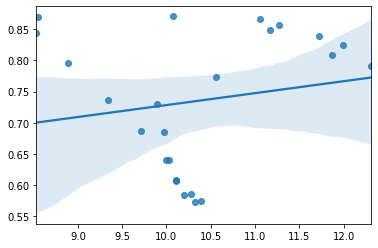

In [92]:
# От чего зависит видимость?
hum_avg = []
t_avg = []
wind_avg = []
vis_avg = []
deg_avg = []

hour_list = data['hour'].unique()
for hour in hour_list:
    hum_avg.append(data[data['hour']==hour]['Humidity'].mean())
    t_avg.append(data[data['hour']==hour]['Temperature (C)'].mean())
    wind_avg.append(data[data['hour']==hour]['Wind Speed (km/h)'].mean())
    deg_avg.append(data[data['hour']==hour]['Wind Bearing (degrees)'].mean())
    vis_avg.append(data[data['hour']==hour]['Visibility (km)'].mean())

sns.regplot(x=vis_avg, y=hum_avg)
# Зависимость видимости от влажности

# Чем выше влага, тем меньше видимость

<AxesSubplot:>

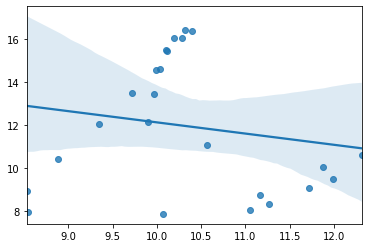

In [93]:
sns.regplot(x=vis_avg, y=t_avg)
# Зависимость видимости от температуры

# Чем ниже температура, тем выше видимость

<AxesSubplot:>

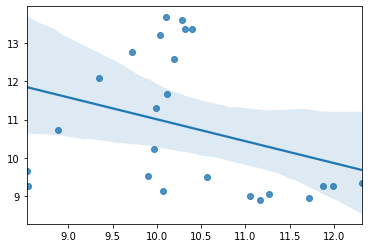

In [94]:
sns.regplot(x=vis_avg, y=wind_avg)
# Зависимость видимости от скорости ветра
# Чем выше скорость ветра, тем выше видимость

<AxesSubplot:>

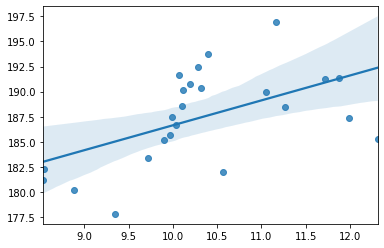

In [95]:
sns.regplot(x=vis_avg, y=deg_avg)
# Зависимость видимости от направления ветра
# Направление ветра никак не влияет на видимость.